# Introduction
This notebook contains all basic knowledge to know about NLTK

In [100]:
#import os to manipulate file
import os

#import wikipedia parser
import wikipedia

#Import nltk to perform nlp operations
import nltk

#Import regexp tokenizer
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize

#Load stopwords
from nltk.corpus import stopwords
##set Stopwords
stop_words = set(stopwords.words('english'))

#get Punctuation
from string import punctuation

#data viz
import matplotlib.pyplot as plt

#stemming
from nltk.stem import PorterStemmer

#Lemming
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/keberger/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Download Text from the internet : tulipmania

In [71]:
text = wikipedia.page("Tulip_mania")
content = text.content
content[0:500]

'Tulip mania (Dutch: tulpenmanie) was a period in the Dutch Golden Age during which contract prices for some bulbs of the recently introduced and fashionable tulip reached extraordinarily high levels and then dramatically collapsed in February 1637. It is generally considered the first recorded speculative bubble; although some researchers have noted that the Kipper und Wipper (literally "Tipper and See-Saw") episode in 1619–1622, a Europe-wide chain of debasement of the metal content of coins to'

# Preprocessing 

## Remove punctuation 

In [72]:
def strip_punctuation(string):
    return ''.join(i for i in string if i not in punctuation)
content = strip_punctuation(content)
content = content.lower()
content[0:100]

'tulip mania dutch tulpenmanie was a period in the dutch golden age during which contract prices for '

## Apply Stemming

In [76]:
pst = PorterStemmer()
content = pst.stem(content)

## Apply lemming

In [81]:
wlem = WordNetLemmatizer()
content = wlem.lemmatize(content)

## Remove stopwords

In [82]:
tokens = nltk.word_tokenize(content)
tokens = [word for word in tokens if word not in stop_words]
print(len(tokens))
tokens[0:10]

2405


['tulip',
 'mania',
 'dutch',
 'tulpenmanie',
 'period',
 'dutch',
 'golden',
 'age',
 'contract',
 'prices']

# Compute words frequence

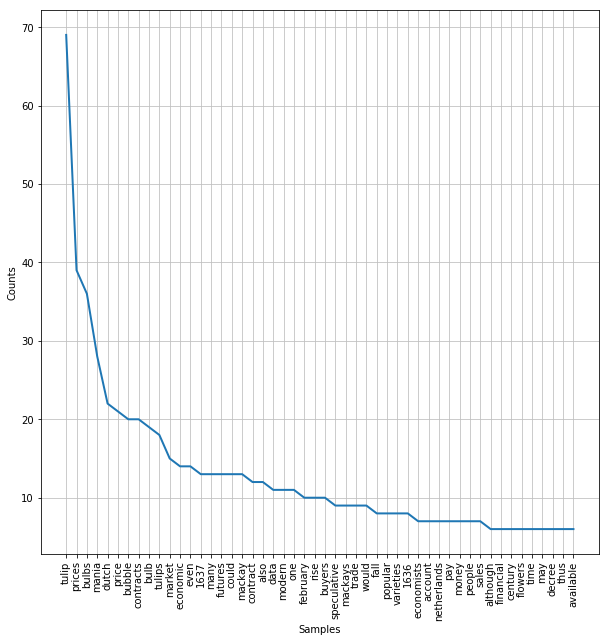

In [84]:
plt.figure(figsize=[10,10])
freq_dist = nltk.FreqDist(tokens)
freq_dist.plot(50)
plt.show()

# Part of Speech Tagging

## First introduction

In [175]:
taggued_content = nltk.pos_tag(tokens)
taggued_content[0:10]

[('tulip', 'NN'),
 ('mania', 'NN'),
 ('dutch', 'NN'),
 ('tulpenmanie', 'NN'),
 ('period', 'NN'),
 ('dutch', 'NN'),
 ('golden', 'JJ'),
 ('age', 'NN'),
 ('contract', 'NN'),
 ('prices', 'NNS')]

## Extract all Nouns

In [95]:
allnouns = [word for word,pos in taggued_content if pos in ['NN','NNP']]
allnouns[0:10]

['tulip',
 'mania',
 'dutch',
 'tulpenmanie',
 'period',
 'dutch',
 'age',
 'contract',
 'tulip',
 'seesaw']

<bound method Counter.elements of FreqDist({'tulip': 54, 'mania': 25, 'price': 21, 'market': 15, 'bulb': 15, 'bulbs': 15, 'contract': 12, 'dutch': 11, 'mackay': 9, 'rise': 7, ...})>


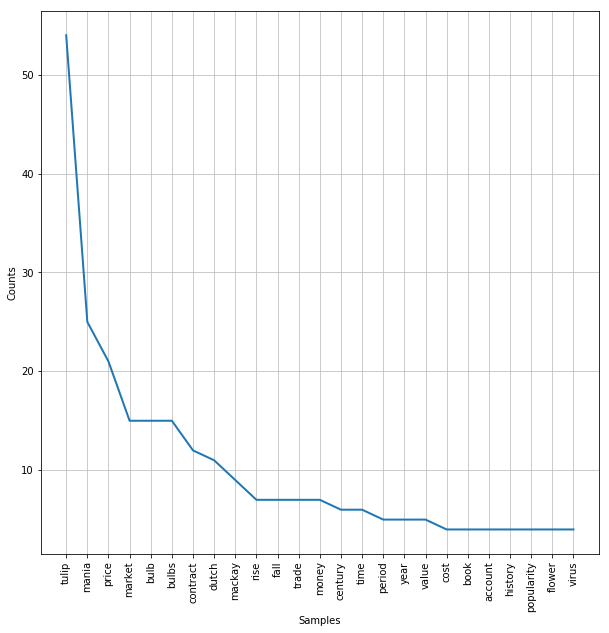

In [166]:
plt.figure(figsize=[10,10])
freq_dist = nltk.FreqDist(allnouns)
print(freq_dist.elements)
freq_dist.plot(25)
plt.show()

## Use of standford tagguer

### Download standfordtagguer 

In [140]:
#download the .jar
import wget
#Download zip
from zipfile import ZipFile
zip_file = 'standford_postagger.zip'

if os.path.isfile(os.getcwd()+"/"+zip_file) == False:
    zip_file = wget.download('https://nlp.stanford.edu/software/stanford-postagger-full-2018-10-16.zip')
    os.rename(zip_file, 'standford_postagger.zip')

#Extract file
with ZipFile(zip_file, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall()
os.rename("stanford-postagger-full-2018-10-16", 'standford_postagger')
print(os.listdir())

File Name                                             Modified             Size
stanford-postagger-full-2018-10-16/            2018-10-16 21:12:30            0
stanford-postagger-full-2018-10-16/README.txt  2018-10-16 21:03:42        11232
stanford-postagger-full-2018-10-16/sample-input.txt 2018-02-17 21:31:44          379
stanford-postagger-full-2018-10-16/data/       2018-10-16 21:12:16            0
stanford-postagger-full-2018-10-16/data/enclitic-inflections.data 2015-01-07 20:53:50      1465288
stanford-postagger-full-2018-10-16/build.xml   2018-10-16 21:09:12         6423
stanford-postagger-full-2018-10-16/stanford-postagger.sh 2018-02-17 21:31:44          262
stanford-postagger-full-2018-10-16/stanford-postagger-3.9.2-javadoc.jar 2018-10-16 21:12:04      4384162
stanford-postagger-full-2018-10-16/stanford-postagger-gui.sh 2018-02-17 21:31:44          100
stanford-postagger-full-2018-10-16/stanford-postagger.jar 2018-10-16 21:11:48      3667733
stanford-postagger-full-2018-10-16/s

### Extract tagguer

In [169]:
from nltk.tag.stanford import StanfordPOSTagger


jar = os.getcwd()+'/stanford_postagger/stanford-postagger.jar'
model = os.getcwd()+'/stanford_postagger/models/english-bidirectional-distsim.tagger'

stanford_tagger = StanfordPOSTagger(model,jar)
stanford_taggued_content = stanford_tagger.tag(tokens)


['tulip', 'mania', 'period', 'age', 'contract', 'tulip', 'february', 'bubble', 'wipper', 'seesaw']
<bound method Counter.elements of FreqDist({'tulip': 69, 'mania': 28, 'price': 21, 'bubble': 20, 'bulb': 19, 'market': 15, 'contract': 12, 'february': 10, 'mackay': 10, 'fall': 8, ...})>


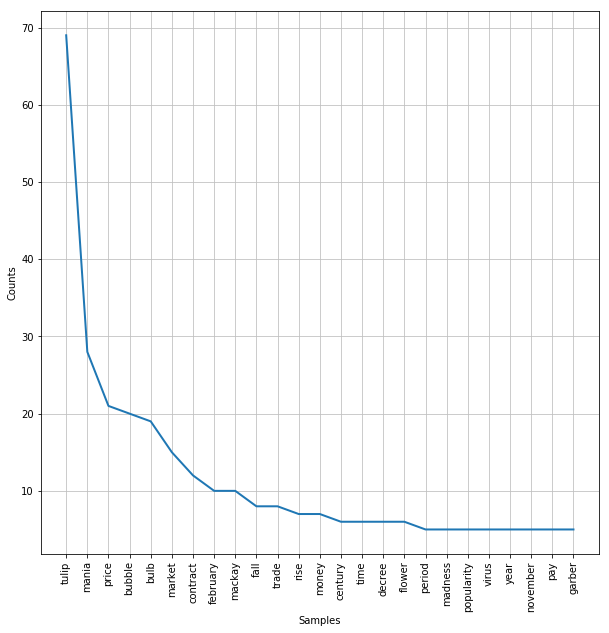

In [170]:
allnouns = [word for word,pos in stanford_taggued_content if pos in ['NN','NNP']]
print(allnouns[0:10])
plt.figure(figsize=[10,10])
freq_dist = nltk.FreqDist(allnouns)
print(freq_dist.elements)
freq_dist.plot(25)
plt.show()

# Named Entity Recognition 

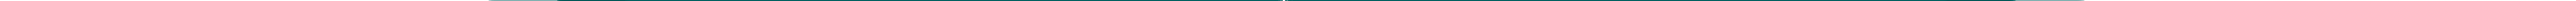

In [176]:
nltk.ne_chunk(tokens,binary=False)

### Download NER tool


In [180]:
#download the .jar
import wget
#Download zip
from zipfile import ZipFile
zip_file = 'stanford_NER.zip'

if os.path.isfile(os.getcwd()+"/"+zip_file) == False:
    zip_file = wget.download('https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip')
    os.rename(zip_file, 'stanford_NER.zip')
    zip_file = 'stanford_NER.zip'

#Extract file
with ZipFile(zip_file, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall()
os.rename("stanford-ner-2018-10-16", 'standford_NER')
print(os.listdir())

File Name                                             Modified             Size
stanford-ner-2018-10-16/                       2018-10-16 21:00:06            0
stanford-ner-2018-10-16/README.txt             2018-10-16 20:59:42        11963
stanford-ner-2018-10-16/ner-gui.bat            2018-10-16 20:59:42           75
stanford-ner-2018-10-16/build.xml              2018-10-16 20:59:42         6077
stanford-ner-2018-10-16/stanford-ner.jar       2018-10-16 20:59:16      4653671
stanford-ner-2018-10-16/sample-conll-file.txt  2018-10-16 20:59:42           79
stanford-ner-2018-10-16/sample.ner.txt         2018-10-16 21:00:08          838
stanford-ner-2018-10-16/stanford-ner-3.9.2-sources.jar 2018-10-16 20:59:16      3561626
stanford-ner-2018-10-16/lib/                   2018-10-16 20:59:16            0
stanford-ner-2018-10-16/lib/joda-time.jar      2018-10-16 20:59:16       629506
stanford-ner-2018-10-16/lib/stanford-ner-resources.jar 2018-10-16 20:59:18     21373256
stanford-ner-2018-10-16/

## Using Stanford NER 

In [188]:
from nltk.tag.stanford import StanfordNERTagger


jar = os.getcwd()+'/stanford_NER/stanford-ner.jar'
classifier = os.getcwd()+'/stanford_NER/classifiers/english.all.3class.distsim.crf.ser.gz'

stanford_ner_tagger = StanfordNERTagger(classifier,jar)
stanford_ner_taggued_content = stanford_ner_tagger.tag(tokens)
stanford_ner_taggued_content[0:150]

[('tulip', 'O'),
 ('mania', 'O'),
 ('dutch', 'O'),
 ('tulpenmanie', 'O'),
 ('period', 'O'),
 ('dutch', 'O'),
 ('golden', 'O'),
 ('age', 'O'),
 ('contract', 'O'),
 ('prices', 'O'),
 ('bulbs', 'O'),
 ('recently', 'O'),
 ('introduced', 'O'),
 ('fashionable', 'O'),
 ('tulip', 'O'),
 ('reached', 'O'),
 ('extraordinarily', 'O'),
 ('high', 'O'),
 ('levels', 'O'),
 ('dramatically', 'O'),
 ('collapsed', 'O'),
 ('february', 'O'),
 ('1637', 'O'),
 ('generally', 'O'),
 ('considered', 'O'),
 ('first', 'O'),
 ('recorded', 'O'),
 ('speculative', 'O'),
 ('bubble', 'O'),
 ('although', 'O'),
 ('researchers', 'O'),
 ('noted', 'O'),
 ('kipper', 'O'),
 ('und', 'O'),
 ('wipper', 'O'),
 ('literally', 'O'),
 ('tipper', 'O'),
 ('seesaw', 'O'),
 ('episode', 'O'),
 ('1619–1622', 'O'),
 ('europewide', 'O'),
 ('chain', 'O'),
 ('debasement', 'O'),
 ('metal', 'O'),
 ('content', 'O'),
 ('coins', 'O'),
 ('fund', 'O'),
 ('warfare', 'O'),
 ('featured', 'O'),
 ('manialike', 'O'),
 ('similarities', 'O'),
 ('bubble', 'O'),

['tulip', 'mania', 'dutch', 'tulpenmanie', 'period', 'dutch', 'golden', 'age', 'contract', 'prices']
<bound method Counter.elements of FreqDist({'tulip': 69, 'prices': 39, 'bulbs': 36, 'mania': 28, 'dutch': 22, 'price': 21, 'bubble': 20, 'contracts': 20, 'bulb': 19, 'tulips': 18, ...})>


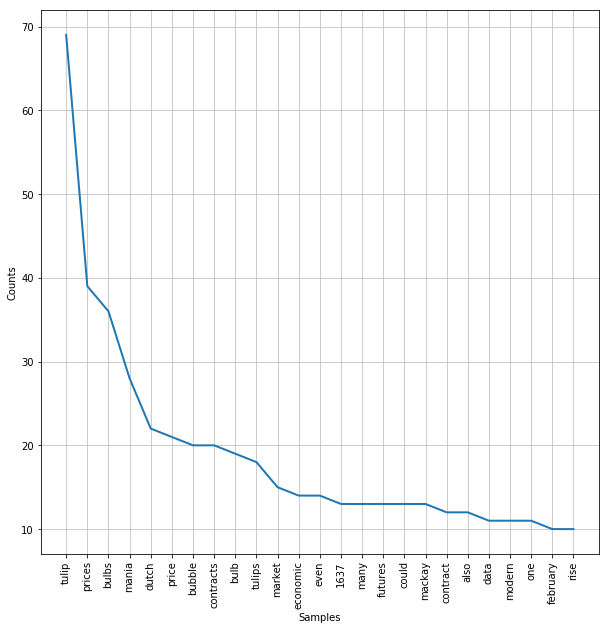

In [191]:
allnouns = [word for word,pos in stanford_ner_taggued_content if pos  in ['O']]
print(allnouns[0:10])
plt.figure(figsize=[10,10])
freq_dist = nltk.FreqDist(allnouns)
print(freq_dist.elements)
freq_dist.plot(25)
plt.show()